<p>In this project, I am going to implement Named Entity Recognition (NER) with Flair NLP on data scraped from Yahoo News to identify the most mentioned places and people in the news headlines.</p>
<p>The steps I will follow to accomplish the project are:</p>
<ol>
    <li>Scraping the website</li>
    <li>Preprocessing the data</li>
    <li>Implementing NER with Flair</li>
    <li>Visualizing the results</li>
</ol>
  

In [189]:
# importing Packages 
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from flair.data import Sentence 
from flair.models import SequenceTagger 

#### Web Scrapping 

In [167]:
# Function to scrape health news
def scrape_health_news(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    # Find the <body> tag
    body = soup.find('body')
    
    # Find all <h3> elements within the <body>
    headline_elements = body.find_all('h3')
    headlines = []
    
    for element in headline_elements:
        headline = element.get_text(strip=True)
        headlines.append(headline)
    
    return headlines

In [168]:
url = "https://news.yahoo.com/"

In [169]:
headlines = scrape_health_news(url)

In [171]:
headlines

['News',
 'Life',
 'Entertainment',
 'Finance',
 'Sports',
 'New on Yahoo',
 'Experts disagree on whether Trump will go to prison',
 'Will it matter? Searching for clues in the polls about a Trump conviction.',
 "Angelina Jolie and Brad Pitt's daughter Shiloh files to change her name",
 'Texas town deploys snow plows after 2 feet of hail, 50-degree temperature swing',
 'Fossil hunter stumbles across million-dollar find in Colorado',
 "There's a program to cancel private student debt. Most don't know about it.",
 'Trump verdict live updates: Trump to speak at 11 a.m. after being convicted on 34 criminal charges',
 "Trump found guilty on all 34 counts of falsifying business records. Here's a breakdown.",
 "FAQ: Can Trump still run for president? Can he still vote? Here's what the guilty verdict means",
 '2024 election: Your guide to all the key primaries, debates and what happens next',
 'Money-Grubbing Felon’s Wild Warning to MAGA: Back Off',
 'Top Five Absurd Republican Reactions to Tr

In [174]:
# Load the NER tagger
tagger = SequenceTagger.load('ner')

2024-05-31 07:55:57,454 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


In [177]:
# Function to extract named entities
def extract_entities(headlines):
    entities = {'PER': [], 'LOC': []}  # PER for persons, LOC for locations
    
    for headline in headlines:
        sentence = Sentence(headline)
        tagger.predict(sentence)
        
        for entity in sentence.get_spans('ner'):
            if entity.tag in entities:
                entities[entity.tag].append(entity.text)
    
    return entities

In [180]:
# Extract entities from headlines
entities = extract_entities(headlines)

In [195]:
entities

{'PER': ['Trump',
  'Angelina Jolie',
  'Brad Pitt',
  'Shiloh',
  'Trump',
  'Trump',
  'Trump',
  'Trump',
  'Darius Rucker',
  'Susan Collins',
  'Ivanka Trump',
  'Donald Trump',
  'Prince Harry',
  'Meghan Markle',
  'William',
  'Kate Middleton',
  'Felon Trump',
  'Delon Wright',
  'Patty Mills',
  'Jennifer Aniston',
  'Biden',
  'Bill Maher',
  'De Niro',
  'Trump',
  'Biden',
  'Trump',
  'Trump',
  'Trump',
  'Biden',
  'Trump'],
 'LOC': ['Texas',
  'Colorado',
  'Miami-Dade',
  'Europe',
  'Ukraine',
  'Russia',
  'California',
  'California',
  'Ukraine',
  'Russia',
  'Los Angeles',
  'Florida',
  'Sacramento',
  'Sacramento',
  'Sacramento Japantown',
  'Sacramento',
  'U.S.',
  'Sacramento',
  'California',
  'Sacramento',
  'Waffle House',
  'NB',
  'Culver City']}

In [181]:
from collections import Counter

In [182]:
# Count the occurrences of each entity
def count_entities(entities):
    entity_counts = {}
    for entity_type, entity_list in entities.items():
        entity_counts[entity_type] = Counter(entity_list)
    return entity_counts

In [209]:
# Get the most common entities
def get_most_common_entities(entity_counts, n=10):
    most_common_entities = {}
    for entity_type, counts in entity_counts.items():
        most_common_entities[entity_type] = counts.most_common(n)
    return most_common_entities

In [210]:
# Count entities
entity_counts = count_entities(entities)

In [211]:
# Get most common entities
most_common_entities = get_most_common_entities(entity_counts)

In [212]:
# Display the most common names and places
print("Most mentioned names:", most_common_entities.get('PER', []))

Most mentioned names: [('Trump', 10), ('Biden', 3), ('Angelina Jolie', 1), ('Brad Pitt', 1), ('Shiloh', 1), ('Darius Rucker', 1), ('Susan Collins', 1), ('Ivanka Trump', 1), ('Donald Trump', 1), ('Prince Harry', 1)]


In [213]:
print("Most mentioned places:", most_common_entities.get('LOC', []))

Most mentioned places: [('Sacramento', 5), ('California', 3), ('Ukraine', 2), ('Russia', 2), ('Texas', 1), ('Colorado', 1), ('Miami-Dade', 1), ('Europe', 1), ('Los Angeles', 1), ('Florida', 1)]


In [214]:
most_common_entities['PER'][0]

('Trump', 10)

In [215]:
# Function to plot bar chart
def plot_bar_chart(data, entity_type):
    entities, counts = zip(*data)
    plt.figure(figsize=(8, 4))
    plt.bar(entities, counts, color='blue')
    plt.xlabel('Entities')
    plt.ylabel('Count')
    plt.title(f'Most Common {entity_type}s')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

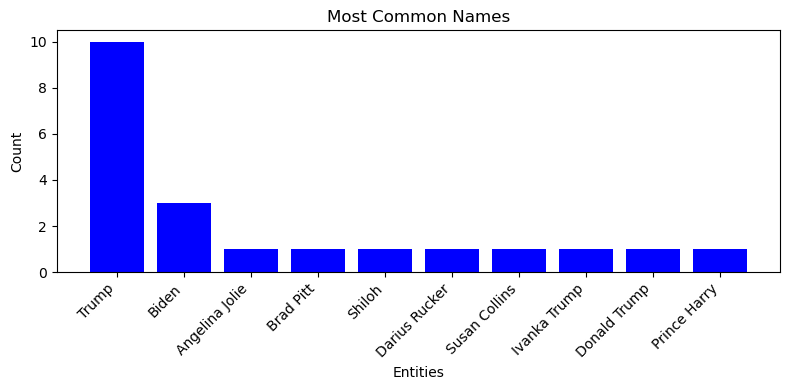

In [216]:
# Plot most common names
plot_bar_chart(most_common_entities['PER'], 'Name')

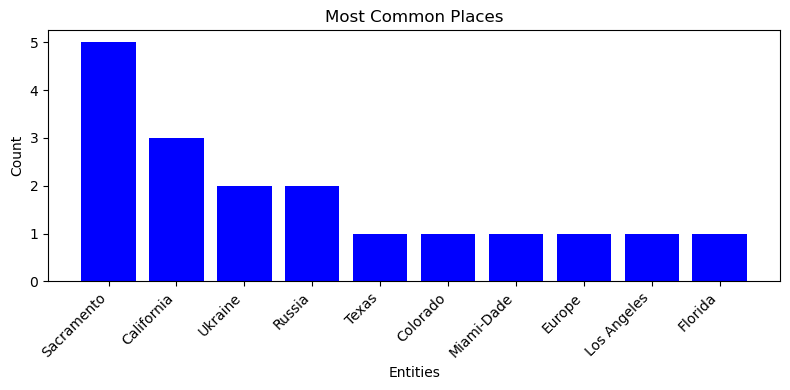

In [217]:
# Plot most common places
plot_bar_chart(most_common_entities['LOC'], 'Place')